# Predicting Diabetes with Multilayer Perceptrons
#### This notebook looks into using ML and data science to build ML models capable of predicting diabetes based on medical attributes

In [1]:
from platform import python_version
print("Python Version:", python_version())

Python Version: 3.9.7


In [2]:
import sklearn

print(sklearn.__version__)

1.0.2


In [3]:
# Import all the tools needed

# Regular Exploratory Data Analysis and plotting libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Scikit-Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Data Dictionary 

1. Pregnancies- Number of Previous Pregnacies
2. Glucose - plasma glucose concentration
3. Blood Pressue - Diaslistic Blood Pressure 
4. Skin Thickness - Skin Fold Thickness( Messured at triceps)
5. Insulin - Blood Serum Insulin Concentration
6. BMI - Body Mass Index
7. Diabetes Pedigree Function - Genentic Predisposition from disbetes
8. Age - Age in years
9. Outcome - 1-> Develpoed diabetes within 5 years.
             0-> No diabetes


In [4]:
diabetes_df = pd.read_csv("diabetes.csv")

In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


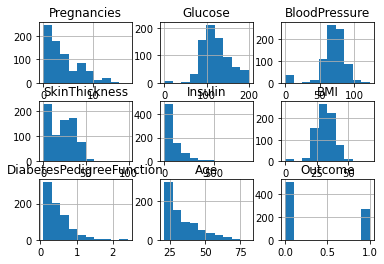

In [8]:
from matplotlib import pyplot as plt
diabetes_df.hist();

In [9]:
diabetes_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

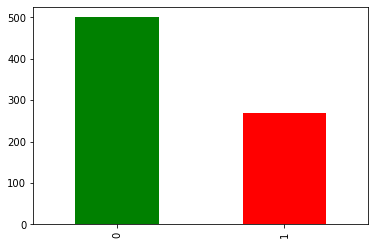

In [10]:
diabetes_df["Outcome"].value_counts().plot(kind="bar", color= ["green", "red"]);

In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# Check for missing values
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Diabetes Frequency according to Pregnancies

In [14]:
diabetes_df.BMI.value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [15]:
# Compare Outcome column with Pregnancies column
pd.crosstab(diabetes_df.Outcome,diabetes_df.Pregnancies)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


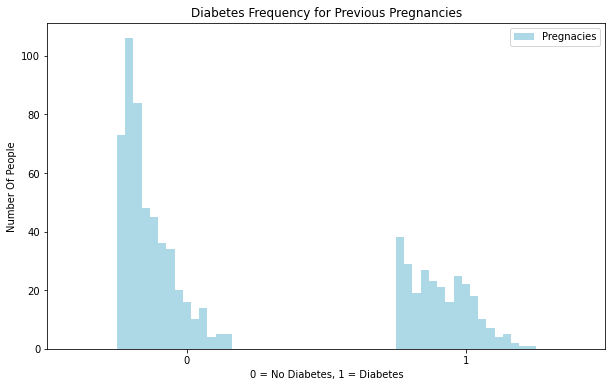

In [16]:
# Create a plot for crosstab
pd.crosstab(diabetes_df.Outcome, diabetes_df.Pregnancies).plot(kind="bar", 
                                                                figsize= (10,6),
                                                               color=["lightblue"]);
plt.title("Diabetes Frequency for Previous Pregnancies")
plt.xlabel("0 = No Diabetes, 1 = Diabetes")
plt.ylabel("Number Of People")
plt.legend(["Pregnacies"]);
plt.xticks(rotation=0);

# Age vs BMI for Diabetes 

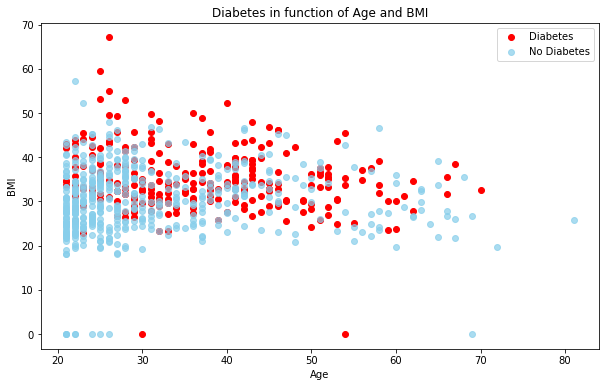

In [17]:
plt.figure(figsize=(10,6))

# Scatter Plot with positive examples
plt.scatter(diabetes_df.Age[diabetes_df.Outcome == 1], 
                            diabetes_df.BMI[diabetes_df.Outcome == 1],
                            c = "red");

# Scatter plot with negative examples
plt.scatter(diabetes_df.Age[diabetes_df.Outcome == 0], 
                            diabetes_df.BMI[diabetes_df.Outcome == 0],
                            c = "skyblue", alpha=0.7);
plt.title("Diabetes in function of Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["Diabetes", "No Diabetes"]);

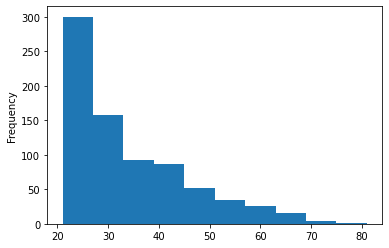

In [18]:
# Check distrubution of Age column with a histogram
diabetes_df.Age.plot.hist();

# Diabetes frequency for BMI with Family History

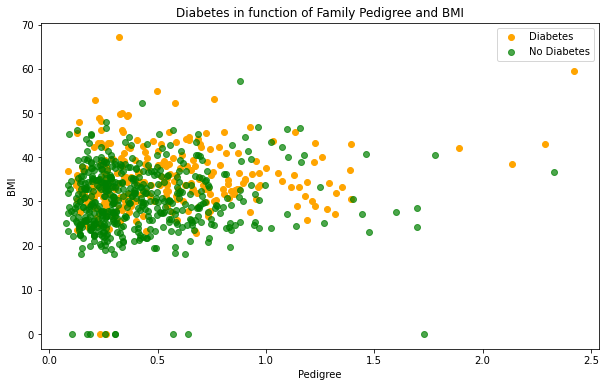

In [19]:
# Scatter Plot with positive examples
plt.figure(figsize=(10,6))
plt.scatter(diabetes_df.DiabetesPedigreeFunction[diabetes_df.Outcome == 1], 
                            diabetes_df.BMI[diabetes_df.Outcome == 1],
                            c = "orange");

# Scatter plot with negative examples
plt.scatter(diabetes_df.DiabetesPedigreeFunction[diabetes_df.Outcome == 0], 
                            diabetes_df.BMI[diabetes_df.Outcome == 0],
                            c = "green", alpha=0.7);
plt.title("Diabetes in function of Family Pedigree and BMI")
plt.xlabel("Pedigree")
plt.ylabel("BMI")
plt.legend(["Diabetes", "No Diabetes"]);

# Diabetes frequency realtive to skin thickness and age

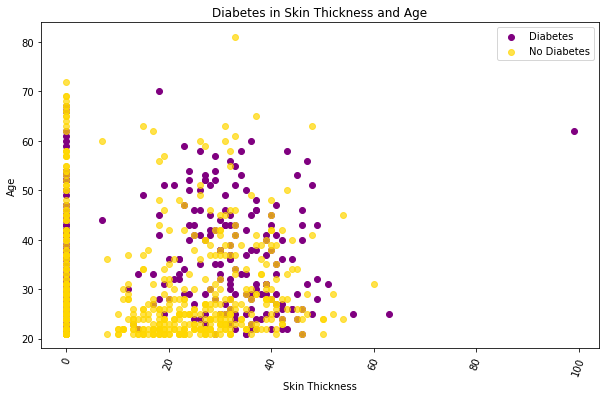

In [20]:
# Scatter Plot with positive examples
plt.figure(figsize=(10,6))
plt.scatter(diabetes_df.SkinThickness[diabetes_df.Outcome == 1], 
                            diabetes_df.Age[diabetes_df.Outcome == 1],
                            c = "purple");

# Scatter plot with negative examples
plt.scatter(diabetes_df.SkinThickness[diabetes_df.Outcome == 0], 
                            diabetes_df.Age[diabetes_df.Outcome == 0],
                            c = "gold", alpha=0.7);
plt.title("Diabetes in Skin Thickness and Age")
plt.xlabel("Skin Thickness")
plt.ylabel("Age")
plt.legend(["Diabetes", "No Diabetes"]);
plt.xticks(rotation=70);

In [21]:
# Make a correlation matrix
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


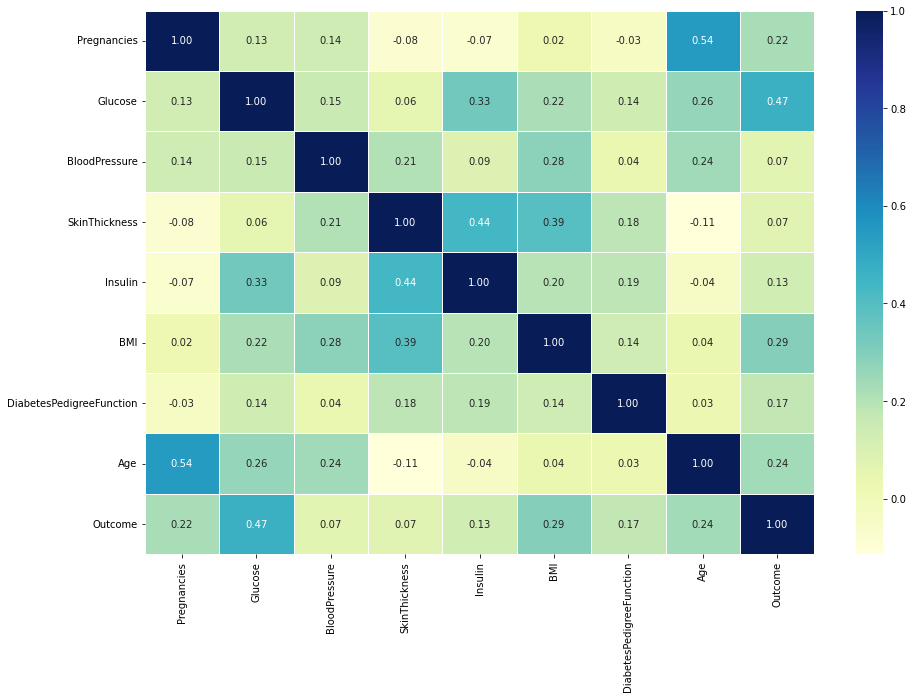

In [22]:
# seaborn correclation matrix to look cleaner
corr_matrix = diabetes_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap="YlGnBu")

# 

# Modeling

In [23]:
# Split the data into X and y
X = diabetes_df.drop("Outcome", axis=1)

y = diabetes_df["Outcome"]

In [24]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [26]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [27]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [28]:
y_train, len(y_train)

(60     0
 618    1
 346    0
 294    0
 231    1
       ..
 71     0
 106    0
 270    1
 435    1
 102    0
 Name: Outcome, Length: 614, dtype: int64,
 614)

In [29]:
# Going to try several differnt machine learning models to achieve highest accurecy and speed for data set
# 1. Logistic Regression
# 2. K-Nearest Neighbors Classifier
# 3. Random Forest Classifier

In [30]:
# Put model in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
            "KNN" : KNeighborsClassifier(),
             "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evelatues given machine learning models.
    models : a dict of different Scikit_learn machine learning models
    X_train : training data( no labels)
    X_test : training labels(no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        # Eval the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                           X_test = X_test,
                           y_train = y_train,
                           y_test = y_test)

model_scores

C:\Users\Z\Desktop\capstone_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7207792207792207}

## Model comparison

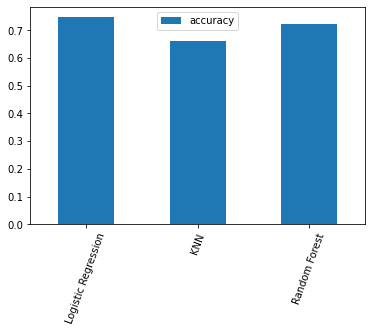

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=70);

In [33]:
# Here we see that KNN is the least accurate so I will not utilize KNN

# Hyperparameter tuning

In [34]:
# Tune KNN

train_scores = []
test_scores = []

# Create a list of different values of N Neighbors, this adjusts the default values of nearest neighbors
neighbors = range(1, 21)

# setup the KNN Instance
knn = KNeighborsClassifier()

# loop through different N-neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorhim 
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [35]:
train_scores

[1.0,
 0.8322475570032574,
 0.8550488599348535,
 0.8094462540716613,
 0.7980456026058632,
 0.7882736156351792,
 0.7931596091205212,
 0.7768729641693811,
 0.7931596091205212,
 0.7899022801302932,
 0.7866449511400652,
 0.7833876221498371,
 0.7899022801302932,
 0.7899022801302932,
 0.7850162866449512,
 0.7850162866449512,
 0.7833876221498371,
 0.7703583061889251,
 0.7752442996742671,
 0.7719869706840391]

In [36]:
test_scores

[0.6753246753246753,
 0.7012987012987013,
 0.6493506493506493,
 0.7077922077922078,
 0.6623376623376623,
 0.7272727272727273,
 0.6883116883116883,
 0.7467532467532467,
 0.7207792207792207,
 0.7662337662337663,
 0.7337662337662337,
 0.7792207792207793,
 0.7727272727272727,
 0.7727272727272727,
 0.7597402597402597,
 0.7792207792207793,
 0.7727272727272727,
 0.7597402597402597,
 0.7532467532467533,
 0.7272727272727273]

Maximum KNN score on the test data:) 77.92%


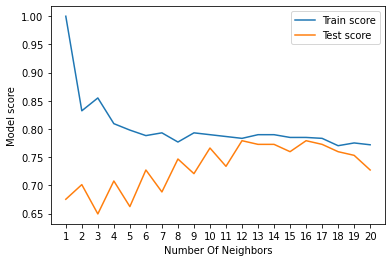

In [37]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number Of Neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data:) {max(test_scores)*100:.2f}%")

In [38]:
# Even with Hyperparameter tuning, we see that KNN is still least accuracte for our data set

## Hyperpameter tuning with RandomizedSearchCV

In [39]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

In [40]:
# Tuning LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for ligisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperparameter search for ligisticregression


In [41]:
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_ 

{'solver': 'liblinear', 'C': 4.281332398719396}

In [43]:
rs_log_reg.score(X_test, y_test)

0.7597402597402597

### Same with Random Forest

In [44]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomFOrestClasscifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv=5,
                               n_iter = 21,
                               verbose = True)

# Fit random hyperparam search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=21,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
# Find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [46]:
# Evalute the randomized search randomforestclassifier model
rs_rf.score(X_test, y_test)

0.7597402597402597

In [47]:
model_scores

{'Logistic Regression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7207792207792207}

## Hyperparamter Tuning with GridSearchCV

Since the LogisticRegression model provides the best base score relative to KNN and Random forest tuned scores,
we will improve them using GridSearchCV

In [48]:
# Diff hyper.parm for LogReg model
log_rg_grid = {"C": np.logspace(-4, 4, 30),
              "solver": ["liblinear"]}

#setup grid hyperparm search for LogReg
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)
# Fit grid hyperparm search model
gs_log_reg.fit(X_train.values,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [49]:
# Check for best hyperparm
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [50]:
# Eval gridsearch logreg model
gs_log_reg.score(X_test.values,y_test)

0.7597402597402597

In [51]:
model_scores

{'Logistic Regression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7207792207792207}

## Evalutng Tuned Model

In [52]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

C:\Users\Z\Desktop\capstone_project\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [53]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [54]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

C:\Users\Z\Desktop\capstone_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Z\Desktop\capstone_project\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


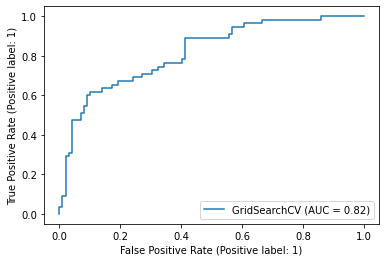

In [55]:
# Plot ROC Curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [56]:
# Confusion Matrix 
print(confusion_matrix(y_test, y_preds))

[[80 19]
 [18 37]]


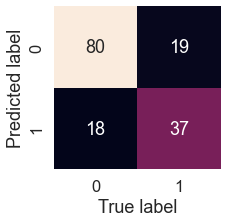

In [57]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a confusion matrix using heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    

    
plot_conf_mat(y_test,y_preds)


In [58]:
# False Negative - 19
# False Postitves - 18

In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



### Calculate evalution metrics using cross-validation

In [60]:
# CHech for the best hyperpatms
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [61]:
# Create new classifier with best params
clf = LogisticRegression(C=4.281332398719396,
                        solver = "liblinear")

In [62]:
# Cross-Validatd accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring="accuracy")
cv_acc

array([0.77272727, 0.74675325, 0.74025974, 0.81045752, 0.77124183])

In [63]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7682879212290977

In [64]:
# Cross-Validatd precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.7169979783018878

In [65]:
# Cross-Validatd recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.5598183088749126

In [66]:
# Cross-Validatd f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.6266847398697644

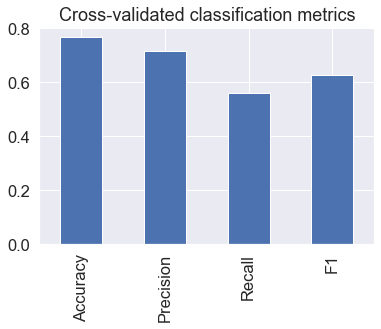

In [67]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend = False);

## Feature Importance
Figure out which features of our data set contributed the most to the outomce of the Logistic Regression model

In [68]:
# Fit instance of LogReg
clf = LogisticRegression(C=4.281332398719396,
                        solver = "liblinear")

clf.fit(X_train, y_train);

In [69]:
# check coef_
clf.coef_

array([[ 0.06545756,  0.03097764, -0.01540175,  0.00267072, -0.00151012,
         0.08822157,  0.60333852,  0.03240141]])

In [70]:
# Math the coef of features to columns
feature_dict = dict(zip(diabetes_df.columns,list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.0654575567066592,
 'Glucose': 0.03097763964843688,
 'BloodPressure': -0.015401745601977141,
 'SkinThickness': 0.0026707226147341247,
 'Insulin': -0.001510124350496078,
 'BMI': 0.08822156750956504,
 'DiabetesPedigreeFunction': 0.6033385196103556,
 'Age': 0.032401405702777566}

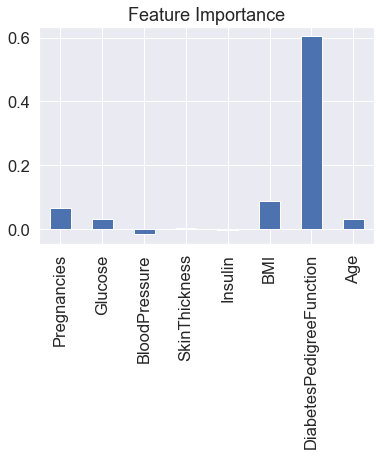

In [71]:
# Visual feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [72]:
import pickle

In [73]:
filename = 'diabetes_pred_model_2.pickle'
pickle.dump(gs_log_reg,open(filename,'wb'))